In [1]:
path = '/Users/descombe/Desktop/QGIS/MHL/Bati_1727_Melotte.csv'

In [32]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [132]:
wkt = pd.read_csv(path, header=0, usecols = ['WKT'])
height_df = pd.read_csv(path, header=0, usecols = ['height'])

if 'POINT' in wkt['WKT'][0]:
    geometry = wkt['WKT'].apply(lambda x : x.replace('POINT ', '').replace('(', '').replace(')', '').strip())
#elif 'POLYGON' in wkt['WKT'][0]:
#    geometry = wkt['WKT'].apply(lambda x : x.replace('POLYGON ', '').replace('(', '').replace(')', '').strip())

elif 'MULTIPOLYGON' in wkt['WKT'][0]:
    geometry = wkt['WKT'].apply(lambda x : x.replace('MULTIPOLYGON', '').replace('(', '').replace(')', '').strip())

height_df.fillna(0, inplace = True)
height_df = height_df.astype(int)
height = [x[0] for x in height_df.values]

In [133]:
pt_list = []
vertices_list = []
x_list = []
y_list = []
poly_list = []

z_0 = [0 * x for x in height]

for coors, z in zip(geometry.tolist() + geometry.tolist(), z_0 + height):
    
    poly = []
    
    for coor in coors.split(','):
        
        x = np.float( coor.split()[0] )
        y = np.float( coor.split()[1] )
        
        poly.append( [ x , y , z ])
        x_list.append( x )
        y_list.append( y )
        
    poly_list.append( poly )

<ipython-input-133-ece2a9440e1d>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.float( coor.split()[0] )
<ipython-input-133-ece2a9440e1d>:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.float( coor.split()[1] )


In [141]:
len(poly_list)

1860

In [142]:
faces_list  = []

vert_a = 0

for poly in poly_list:
    
    faces  = []

    for j in range(vert_a, vert_a + len(poly) - 1 ):
        
        vertices_list.append( [j, j + 1] )
        faces.append( j )
    
    faces.append( j + 1 )
    faces_list.append(faces)
    vert_a += len(poly)

In [143]:
len(vertices_list)

10600

In [152]:
max(max(faces_list)) - 1 

12458

In [ ]:
"""
pt_list = []
mean_x = np.mean(x_list)
mean_y = np.mean(y_list)


height = [z[0] for z in height_df.values]
mean_z = np.mean(height)

z = 0


for x, y in zip(x_list, y_list):
    pt_list.append( [ ( x - mean_x ) , ( y - mean_y )  , z ] )         
        

for x, y, z in zip(x_list, y_list, height):
    pt_list.append( [ ( x - mean_x ) , ( y - mean_y )  , z - mean_z ] )         
    
for coors in geometry:
    """

In [96]:

"""vertices_coor = []

for pts in poly_list:
    for pt in pts:
        vertices_coor.append([pt[0], pt[1], 0])
        
for pts, z in zip(poly_list, height):
    for pt in pts:
        vertices_coor.append([pt[0], pt[1], z])
        

for j in range(vert_a, vert_a + len(coors.split(',')) - 1 ):

    vertices_list.append( [j, j + 1] )
    faces.append( j )

faces.append( j + 1 )
faces_list.append(faces)
vert_a += len(coors.split(','))"""

In [153]:
header = ['ply',
 'format ascii 1.0',
 'element vertex %d' % ( max(max(faces_list)) - 1 ),
 'property double x',
 'property double y',
 'property double z',
 'property uchar red',
 'property uchar green',
 'property uchar blue',
      'element face %s' % len(faces_list),
'property list uchar int vertex_index',
 'end_header']

z = 0 # can be modified but the same height will be assigned to all points

path_out = path.replace('.csv', '.ply')
with open(path_out, 'w') as file:
    for line in header:
        file.write("%s\n" % line)
    for pt in pt_list:
        file.write("%f %f %d 255 0 0\n" % (pt[0], pt[1], z))     
    #for pt in vertices_list:
    #    file.write("%d %d 255 0 0\n" % (pt[0], pt[1])) 
    for pts in faces_list:
        file.write("%d " % len(pts))
        for pt in pts:
            file.write("%d " % pt)
        file.write("\n")
        


In [23]:
  'element edge %s' % len(vertices_list),
    'property int vertex1',
    'property int vertex2',
    'property uchar red',
    'property uchar green',
    'property uchar blue',

IndentationError: unexpected indent (<ipython-input-23-bf2fc6fbb4e4>, line 2)

In [39]:
# normalize and -0.5
np.linalg.norm(x_list)

2538266.40918202

In [42]:
xplot = []
for x in x_list:
    xplot.append( ( x - np.mean(x_list) ) / np.linalg.norm(x_list) )

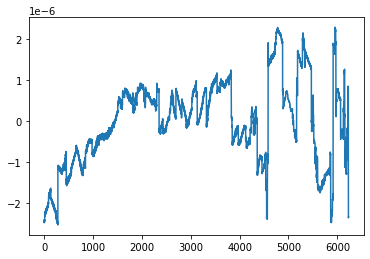

In [75]:
plt.plot(xplot)

In [76]:
min(xplot), max(xplot)

(-2.5298712430682426e-06, 2.29560055705747e-06)